In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import os

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [2]:
df=pd.read_excel("https://www1.nyc.gov/assets/finance/downloads/pdf/rolling_sales/annualized-sales/2016/2016_statenisland.xls",header=4)
#https://www1.nyc.gov/assets/finance/downloads/pdf/rolling_sales/rollingsales_statenisland.xls

In [3]:
df.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,5,ANNADALE,01 ONE FAMILY DWELLINGS,1,5391,9,,A5,4726 AMBOY ROAD,,...,1,0,1,3067,1110,2002,1,A5,520000,2016-04-21
1,5,ANNADALE,01 ONE FAMILY DWELLINGS,1,5391,30,,A1,1306 ARDEN AVENUE,,...,1,0,1,7500,1890,1952,1,A1,0,2016-05-04
2,5,ANNADALE,01 ONE FAMILY DWELLINGS,1,5395,15,,A1,10 EDWIN STREET,,...,1,0,1,7000,2200,1980,1,A1,10,2016-04-21
3,5,ANNADALE,01 ONE FAMILY DWELLINGS,1,5397,60,,A1,33 EYLANDT STREET,,...,1,0,1,10120,3516,1984,1,A1,0,2016-08-10
4,5,ANNADALE,01 ONE FAMILY DWELLINGS,1,5399,26,,A1,235 KOCH BOULEVARD,,...,1,0,1,9555,1528,1960,1,A1,0,2016-02-11


In [4]:
df.columns = df.columns.str.replace('\n', '')

In [5]:
df.columns

Index(['BOROUGH', 'NEIGHBORHOOD', 'BUILDING CLASS CATEGORY',
       'TAX CLASS AT PRESENT', 'BLOCK', 'LOT', 'EASE-MENT',
       'BUILDING CLASS AT PRESENT', 'ADDRESS', 'APARTMENT NUMBER', 'ZIP CODE',
       'RESIDENTIAL UNITS', 'COMMERCIAL UNITS', 'TOTAL UNITS',
       'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'YEAR BUILT',
       'TAX CLASS AT TIME OF SALE', 'BUILDING CLASS AT TIME OF SALE',
       'SALE PRICE', 'SALE DATE'],
      dtype='object')

In [6]:
df1=df[['BOROUGH','NEIGHBORHOOD','BUILDING CLASS CATEGORY','ZIP CODE','SALE PRICE', 'SALE DATE']]

In [7]:
df1= df1[df1['SALE PRICE'] != 0]

In [8]:
df1.columns

Index(['BOROUGH', 'NEIGHBORHOOD', 'BUILDING CLASS CATEGORY', 'ZIP CODE',
       'SALE PRICE', 'SALE DATE'],
      dtype='object')

In [9]:
df2=df1.groupby(['ZIP CODE'])[['SALE PRICE']].mean()

In [10]:
df2.reset_index(inplace=True)

In [34]:
import urllib.request
urllib.request.urlretrieve("https://data.cityofnewyork.us/download/i8iw-xf4u/application%2Fzip", "file.gz")

('file.gz', <http.client.HTTPMessage at 0x7fb7f38b5278>)

In [12]:
!unzip file.gz

Archive:  file.gz
  inflating: ZIP_CODE_040114.shx     
  inflating: ZIP_CODE_040114.dbf     
  inflating: ZIP_CODE_040114.prj     
  inflating: ZIP_CODE_040114.sbn     
  inflating: ZIP_CODE_040114.sbx     
  inflating: ZIP_CODE_040114.shp     
  inflating: ZIP_CODE_040114.shp.xml  


In [12]:
print("PUIdata", os.getenv("PUIDATA"))

('PUIdata', '/nfshome/ss12513/PUIdata')


In [13]:
os.environ["PUIDATA"] = "%s/PUIdata"%os.getenv("HOME")

print("PUIdata", os.getenv("PUIDATA"))

('PUIdata', '/nfshome/ss12513/PUIdata')


In [14]:
!mv ZIP_CODE_040114.shx $PUIDATA
!mv ZIP_CODE_040114.dbf $PUIDATA
!mv ZIP_CODE_040114.prj $PUIDATA
!mv ZIP_CODE_040114.sbn $PUIDATA
!mv ZIP_CODE_040114.sbx $PUIDATA
!mv ZIP_CODE_040114.shp $PUIDATA
!mv ZIP_CODE_040114.shp.xml $PUIDATA

In [11]:
import geopandas
zipcode=geopandas.GeoDataFrame.from_file(os.getenv("PUIDATA") +"/ZIP_CODE_040114.shp")
zipcode.head()

,ZIPCODE,BLDGZIP,PO_NAME,POPULATION,AREA,STATE,COUNTY,ST_FIPS,CTY_FIPS,URL,SHAPE_AREA,SHAPE_LEN,geometry
0,11436,0,Jamaica,18681.0,2.269930e+07,NY,Queens,36,081,http://www.usps.com/,0.0,0.0,"POLYGON ((1038098.251871482 188138.3800067157,..."
1,11213,0,Brooklyn,62426.0,2.963100e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((1001613.712964058 186926.4395172149,..."
2,11212,0,Brooklyn,83866.0,4.197210e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((1011174.275535807 183696.33770971, 1..."
3,11225,0,Brooklyn,56527.0,2.369863e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((995908.3654508889 183617.6128015518,..."
4,11218,0,Brooklyn,72280.0,3.686880e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((991997.1134308875 176307.4958601296,..."


In [12]:
zipcode=zipcode[['ZIPCODE','PO_NAME','geometry']]

In [13]:
zipcode.head()

,ZIPCODE,PO_NAME,geometry
0,11436,Jamaica,"POLYGON ((1038098.251871482 188138.3800067157,..."
1,11213,Brooklyn,"POLYGON ((1001613.712964058 186926.4395172149,..."
2,11212,Brooklyn,"POLYGON ((1011174.275535807 183696.33770971, 1..."
3,11225,Brooklyn,"POLYGON ((995908.3654508889 183617.6128015518,..."
4,11218,Brooklyn,"POLYGON ((991997.1134308875 176307.4958601296,..."


In [14]:
zipcode['ZIPCODE']=zipcode['ZIPCODE'].astype(int)
df2['ZIP CODE']=df2['ZIP CODE'].astype(int)

In [15]:
mer=zipcode.merge(df2,left_on="ZIPCODE",right_on="ZIP CODE")
mer.head()

,ZIPCODE,PO_NAME,geometry,ZIP CODE,SALE PRICE
0,10301,Staten Island,"POLYGON ((959467.6194348931 175129.5740033835,...",10301,434939
1,10303,Staten Island,"POLYGON ((934731.324747473 173422.4451998025, ...",10303,393015
2,10302,Staten Island,"POLYGON ((945602.2692129016 172744.2838264704,...",10302,385327
3,10304,Staten Island,"POLYGON ((960903.1661044806 170553.3456230462,...",10304,608027
4,10314,Staten Island,"POLYGON ((951029.2203012258 165817.4000424594,...",10314,523308


In [16]:
mer

,ZIPCODE,PO_NAME,geometry,ZIP CODE,SALE PRICE
0,10301,Staten Island,"POLYGON ((959467.6194348931 175129.5740033835,...",10301,434939
1,10303,Staten Island,"POLYGON ((934731.324747473 173422.4451998025, ...",10303,393015
2,10302,Staten Island,"POLYGON ((945602.2692129016 172744.2838264704,...",10302,385327
3,10304,Staten Island,"POLYGON ((960903.1661044806 170553.3456230462,...",10304,608027
4,10314,Staten Island,"POLYGON ((951029.2203012258 165817.4000424594,...",10314,523308
5,10305,Staten Island,"POLYGON ((966589.4293382317 163908.5154087991,...",10305,449903
6,10306,Staten Island,"POLYGON ((955977.1562714726 152284.8755983859,...",10306,425641
7,10308,Staten Island,"POLYGON ((938154.3867989779 143446.3496402949,...",10308,452259
8,10312,Staten Island,"POLYGON ((928850.4533071518 143511.4033159614,...",10312,499221
9,10309,Staten Island,"POLYGON ((925030.2516299784 142864.4400429726,...",10309,669994


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


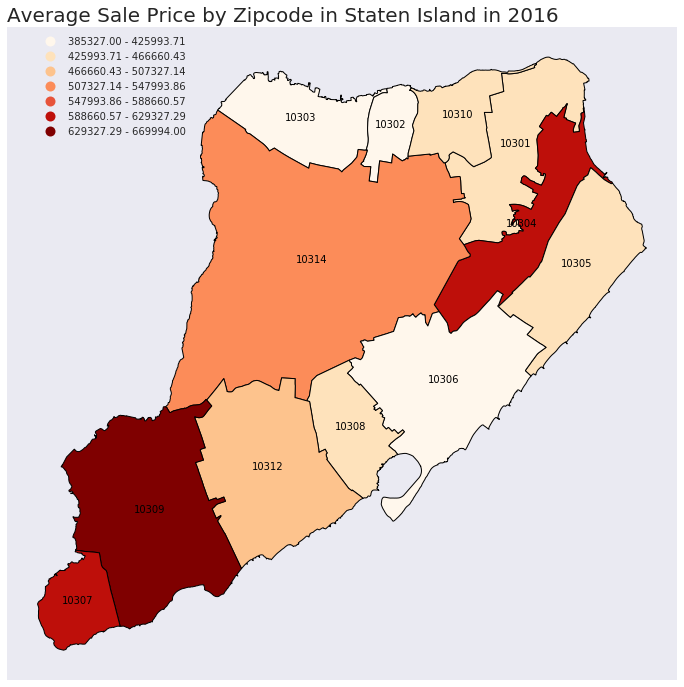

In [21]:
f, ax = plt.subplots(figsize=(12,12))
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
ax.set_title("Average Sale Price by Zipcode in Staten Island in 2016", fontdict={'fontsize': 20}, loc='left')
mer.plot(column='SALE PRICE',cmap='OrRd',alpha=1,linewidth=1,ax=ax, scheme="equal_interval", legend=True, k=7,edgecolor="black")
for idx, row in mer.iterrows():
        #####your code here##### # put neighborhood names on the plot in red font
        plt.annotate(s=row['ZIPCODE'], xy=row.geometry.centroid.coords[0], horizontalalignment='center',color='Black', size=10)
ax.get_legend().set_bbox_to_anchor((0,0.3,0.28,0.7))
plt.savefig("Average-Sale-Price-Staten-Island.png")